##### Copyright 2025 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Analyze a Video - Classification

This notebook uses multimodal capabilities of the Gemini model to classify the species of animals shown in a video.

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Analyze_a_Video_Classification.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

In [27]:
%pip install -U -q "google-genai>=1.0.0"

## Configure your API key

To run the following cell, your API key must be stored in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Authentication.ipynb) for an example.

In [28]:
from google.colab import userdata
from google import genai

API_KEY = userdata.get('GOOGLE_API_KEY')
client = genai.Client(api_key=API_KEY)

## Example

This example uses a [video](https://commons.wikimedia.org/wiki/File:American_black_bears_%28Ursus_americanus%29.webm) published by Bryon Evans containing an American black bear.

The video falls under the [Creative Commons Attribution 3.0 Unported license](https://creativecommons.org/licenses/by/3.0/deed.en).

In [36]:
# Download video
for i in range(49):
  path1 = "video.mp4"
  path2 = "audio.wav"
  path3 = "text.txt"
  url1 = "https://pub-72ecee33f28043d2ac3b53650ad6a89a.r2.dev/{i}.mp4"
  url2 = "https://pub-72ecee33f28043d2ac3b53650ad6a89a.r2.dev/{i}.wav"
  url3 = "https://pub-72ecee33f28043d2ac3b53650ad6a89a.r2.dev/{i}.txt"
  !wget $url1 -O $path1
  !wget $url2 -O $path2
  !wget $url3 -O $path3
  # Upload video
  video_file = client.files.upload(file=path1)
  audio_file = client.files.upload(file=path2)
  txt_file = client.files.upload(file=path3)

  system_prompt = """
  You are a depression diagnosis tool.
  Based on the text, audio, and video of the participant answering the question, please tell me whether this person is depressed or not.
  Only answer 'Yes' or 'No' without any explanations.
  """
  from google.genai import types

  MODEL_ID="gemini-2.5-flash-preview-05-20" # @param ["gemini-2.0-flash-lite","gemini-2.0-flash","gemini-2.5-flash-preview-05-20","gemini-2.5-pro-preview-05-06"] {"allow-input":true, isTemplate: true}
  response = client.models.generate_content(
      model=f"models/{MODEL_ID}",
      contents=[
          "The following is a transcript of a participant answering a depression survey question in a video.",
          video_file,
          audio_file,
          txt_file
          ],
      config=types.GenerateContentConfig(
          system_instruction=system_prompt,
          ),
      )
  print(response.text)
  with open("AVEC_results.txt", "a", encoding="utf-8") as f:
      f.write(response.text.strip() + "\n")

--2025-05-30 15:43:44--  https://pub-72ecee33f28043d2ac3b53650ad6a89a.r2.dev/203_2_Freeform_video.mp4
Resolving pub-72ecee33f28043d2ac3b53650ad6a89a.r2.dev (pub-72ecee33f28043d2ac3b53650ad6a89a.r2.dev)... 162.159.140.237, 172.66.0.235, 2a06:98c1:58::eb, ...
Connecting to pub-72ecee33f28043d2ac3b53650ad6a89a.r2.dev (pub-72ecee33f28043d2ac3b53650ad6a89a.r2.dev)|162.159.140.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10174577 (9.7M) [video/mp4]
Saving to: ‘video.mp4’

video.mp4           100%[===================>]   9.70M  --.-KB/s    in 0.1s    

2025-05-30 15:43:44 (70.3 MB/s) - ‘video.mp4’ saved [10174577/10174577]

--2025-05-30 15:43:44--  https://pub-72ecee33f28043d2ac3b53650ad6a89a.r2.dev/203_2_Freeform_video.wav
Resolving pub-72ecee33f28043d2ac3b53650ad6a89a.r2.dev (pub-72ecee33f28043d2ac3b53650ad6a89a.r2.dev)... 162.159.140.237, 172.66.0.235, 2a06:98c1:58::eb, ...
Connecting to pub-72ecee33f28043d2ac3b53650ad6a89a.r2.dev (pub-72ecee33f28043d2ac3b5

Upload the file using the File API so its easier to pass it to the model later on.

To demonstrate the video content, display the first frame:

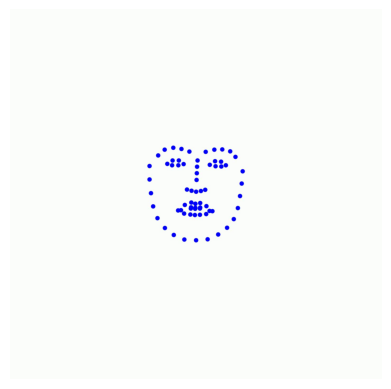

In [38]:
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture(path1)
_, frame = cap.read()

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Display using matplotlib
plt.imshow(frame_rgb)
plt.axis('off')
plt.show()

# close video file
cap.release()

The uploaded video is ready to be analyzed. The constructed prompt instructs the model to classify animals in the video. In addition to providing both their English and Latin names.

In [40]:
from google.genai import types

MODEL_ID="gemini-2.5-flash-preview-05-20" # @param ["gemini-2.0-flash-lite","gemini-2.0-flash","gemini-2.5-flash-preview-05-20","gemini-2.5-pro-preview-05-06"] {"allow-input":true, isTemplate: true}
response = client.models.generate_content(
    model=f"models/{MODEL_ID}",
    contents=[
        "The following is a transcript of a participant answering a depression survey question in a video.",
        video_file,
        audio_file,
        txt_file
        ],
    config=types.GenerateContentConfig(
        system_instruction=system_prompt,
        ),
    )
print(response.text)

No


As you can see, the model accurately named the animal and provided a correct Latin name.

You can delete the video to prevent unnecessary data storage.

In [42]:
# Delete video
client.files.delete(name=video_file.name)
client.files.delete(name=audio_file.name)
client.files.delete(name=txt_file.name)

ClientError: 403 PERMISSION_DENIED. {'error': {'code': 403, 'message': 'You do not have permission to access the File 2vuoclqu2qmy or it may not exist.', 'status': 'PERMISSION_DENIED'}}

## Summary

Now you know how you can prompt Gemini models with videos and use them to classify species of animals.

This notebook shows only one of many use cases. Check the [Video understanding](../quickstarts/Video_understanding.ipynb) notebook for more examples of using the Gemini API with videos.